In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


#### Tratamiento de DataFrame Alquileres

In [497]:
df=pd.read_csv('for_sale.csv')


In [498]:
df.head()

Unnamed: 0                                                          Título  \
0         0.0                           Piso con ascensor en Carolinas Bajas    
1         1.0                             Piso con balcón en Carolinas Bajas    
2         2.0  Piso con terraza en Carrer de Torres Quevedo, Carolinas Bajas    
3         3.0                             Piso con balcón en Carolinas Bajas    
4         4.0                 Piso con aire acondicionado en Carolinas Bajas    

      Precio Habitaciones Planta Superficie Baños Ascensor  Fecha Publicación  \
0  139.000 €            2    NaN         90     1       SI              225.0   
1  115.000 €            2      3         74     1       NO                8.0   
2  115.000 €            3      0         76     1       SI                0.0   
3   94.000 €            3      1         85     1       SI                3.0   
4  146.500 €            4      2        110     2       NO               31.0   

                                                                                                                                   Links  \
0  https://www.fotocasa.es//es/comprar/vivienda/alicante-alacant/aire-acondicionado-calefaccion-ascensor-amueblado/164040342/d?from=list   
1                     https://www.fotocasa.es//es/comprar/vivienda/alicante-alacant/aire-acondicionado-calefaccion/176657539/d?from=list   
2                                   https://www.fotocasa.es//es/comprar/vivienda/alicante-alacant/terraza-ascensor/176722789/d?from=list   
3                        https://www.fotocasa.es//es/comprar/vivienda/alicante-alacant/aire-acondicionado-ascensor/176706426/d?from=list   
4                                 https://www.fotocasa.es//es/comprar/vivienda/alicante-alacant/aire-acondicionado/176348789/d?from=list   

                     Barrio    Ciudad  
0  Carolinas Bajas Alicante  Alicante  
1  Carolinas Bajas Alicante  Alicante  
2  Carolinas Bajas Alicante  Alicante  
3  Carolinas Bajas Alicante  Alicante  
4  Carolinas Bajas Alicante  Alicante

In [499]:
# Remove the rows with null in título and links
df = df[df['Título'].notnull()]
df = df[df['Links'].notnull()]
df = df[df['Precio'].notnull()]
df = df[df['Superficie'].notnull()]
df = df[df['Baños'].notnull()]
# Convert "Precio" column to float
df["Precio"] = df["Precio"].str.replace(" €", "")
df["Precio"] = df["Precio"].str.replace('.','')

df['Precio'] = pd.to_numeric(df['Precio'],errors='coerce') 
df=df[(df['Precio'] > 10000) & (df['Precio'] < 200000)]


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/4284257663.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Precio"] = df["Precio"].str.replace('.','')


In [500]:
df['Planta'] = pd.to_numeric(df['Planta'],errors='coerce') 

average_floor=math.ceil(df['Planta'].astype(float).mean())
df['Planta']=df['Planta'].fillna(average_floor)


In [501]:
df['Baños'] = pd.to_numeric(df['Baños'],errors='coerce') 
average_n_bath=math.ceil(df['Baños'].astype(float).mean())
df['Baños']=df['Baños'].fillna(average_n_bath).astype(int)
df['Fecha Publicación']=df['Fecha Publicación'].astype(int)
df['Planta']= df['Planta'].astype(int)
df['Ascensor']=df['Ascensor'].map(dict(SI=1, NO=0)).astype(int)


In [503]:
df['Superficie'] = pd.to_numeric(df['Superficie'],errors='coerce') 

df=df[(df['Superficie'] > 20) & (df['Superficie'] < 200)]


#### Análisis de Datos de Pisos en Venta

In [504]:
# En euros
precio_medio=df['Precio'].mean()/df['Superficie'].mean()
precio_medio

1249.5313637899321

In [505]:
df['precio_vs_avg'] = (df['Precio']/df['Superficie'])- precio_medio
df['precio_avg']= precio_medio

In [506]:
df

Unnamed: 0  \
0            0.0   
1            1.0   
2            2.0   
3            3.0   
4            4.0   
5            5.0   
6            6.0   
7            7.0   
8            8.0   
9            9.0   
10          10.0   
11          11.0   
12          12.0   
13          13.0   
15          15.0   
16          16.0   
18          18.0   
20          20.0   
21          21.0   
22          22.0   
23          23.0   
25          25.0   
26          26.0   
27          27.0   
28          28.0   
29          29.0   
30          30.0   
31           0.0   
32           1.0   
33           2.0   
34           3.0   
35           4.0   
36           5.0   
37           6.0   
38           7.0   
39           8.0   
40           9.0   
41          10.0   
42          11.0   
44          13.0   
45          14.0   
46          15.0   
47          16.0   
48          17.0   
49          18.0   
50          19.0   
51          20.0   
52          21.0   
53          22.0   
58          27.0   
59          28.0   
60          29.0   
61           0.0   
62           1.0   
63           2.0   
64           3.0   
65           4.0   
66           5.0   
67           6.0   
68           7.0   
70           9.0   
71          10.0   
72          11.0   
73          12.0   
74          13.0   
75          14.0   
76          15.0   
77          16.0   
78          17.0   
79          18.0   
80          19.0   
81          20.0   
82          21.0   
83          22.0   
84          23.0   
85          24.0   
86          25.0   
88          27.0   
89          28.0   
91           0.0   
92           1.0   
93           2.0   
94           3.0   
95           4.0   
96           5.0   
97           6.0   
98           7.0   
99           8.0   
100          9.0   
101         10.0   
102         11.0   
103         12.0   
104         13.0   
107         16.0   
109         18.0   
111         20.0   
112         21.0   
113         22.0   
115         24.0   
116         25.0   
118         27.0   
119         28.0   
120         29.0   
122          1.0   
123          0.0   
124          1.0   
128          5.0   
130          7.0   
132          9.0   
134         11.0   
135         12.0   
136         13.0   
139         16.0   
140         17.0   
141         18.0   
143         20.0   
145         22.0   
147         24.0   
148         25.0   
149         26.0   
154          1.0   
155          2.0   
157          4.0   
158          5.0   
161          8.0   
166         13.0   
168         15.0   
170         17.0   
172         19.0   
173         20.0   
179         26.0   
180         27.0   
184          1.0   
185          2.0   
186          3.0   
188          5.0   
190          7.0   
191          8.0   
192          9.0   
194         11.0   
195         12.0   
196         13.0   
199         16.0   
202         19.0   
203         20.0   
204         21.0   
206         23.0   
208         25.0   
209         26.0   
210         27.0   
212         29.0   
213          0.0   
215          2.0   
216          3.0   
217          4.0   
218          5.0   
221          8.0   
223         10.0   
230         17.0   
231         18.0   
232         19.0   
234         21.0   
235         22.0   
237         24.0   
238         25.0   
239         26.0   
240         27.0   
244          1.0   
245          2.0   
246          3.0   
248          5.0   
249          6.0   
252          9.0   
253         10.0   
254         11.0   
255         12.0   
256         13.0   
257         14.0   
258         15.0   
260         17.0   
261         18.0   
262         19.0   
263         20.0   
264         21.0   
265         22.0   
266         23.0   
268         25.0   
269         26.0   
270         27.0   
271         28.0   
272         29.0   
274          1.0   
278          5.0   
279          6.0   
281          8.0   
283         10.0   
286         13.0   
287         14.0   
289         16.0   
290   

In [507]:
df = pd.get_dummies(df, columns=['Barrio'])


In [508]:
df = df.drop('precio_vs_avg', axis=1)


### Model to determine the Price 

In [509]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

In [510]:
df

Unnamed: 0  \
0            0.0   
1            1.0   
2            2.0   
3            3.0   
4            4.0   
5            5.0   
6            6.0   
7            7.0   
8            8.0   
9            9.0   
10          10.0   
11          11.0   
12          12.0   
13          13.0   
15          15.0   
16          16.0   
18          18.0   
20          20.0   
21          21.0   
22          22.0   
23          23.0   
25          25.0   
26          26.0   
27          27.0   
28          28.0   
29          29.0   
30          30.0   
31           0.0   
32           1.0   
33           2.0   
34           3.0   
35           4.0   
36           5.0   
37           6.0   
38           7.0   
39           8.0   
40           9.0   
41          10.0   
42          11.0   
44          13.0   
45          14.0   
46          15.0   
47          16.0   
48          17.0   
49          18.0   
50          19.0   
51          20.0   
52          21.0   
53          22.0   
58          27.0   
59          28.0   
60          29.0   
61           0.0   
62           1.0   
63           2.0   
64           3.0   
65           4.0   
66           5.0   
67           6.0   
68           7.0   
70           9.0   
71          10.0   
72          11.0   
73          12.0   
74          13.0   
75          14.0   
76          15.0   
77          16.0   
78          17.0   
79          18.0   
80          19.0   
81          20.0   
82          21.0   
83          22.0   
84          23.0   
85          24.0   
86          25.0   
88          27.0   
89          28.0   
91           0.0   
92           1.0   
93           2.0   
94           3.0   
95           4.0   
96           5.0   
97           6.0   
98           7.0   
99           8.0   
100          9.0   
101         10.0   
102         11.0   
103         12.0   
104         13.0   
107         16.0   
109         18.0   
111         20.0   
112         21.0   
113         22.0   
115         24.0   
116         25.0   
118         27.0   
119         28.0   
120         29.0   
122          1.0   
123          0.0   
124          1.0   
128          5.0   
130          7.0   
132          9.0   
134         11.0   
135         12.0   
136         13.0   
139         16.0   
140         17.0   
141         18.0   
143         20.0   
145         22.0   
147         24.0   
148         25.0   
149         26.0   
154          1.0   
155          2.0   
157          4.0   
158          5.0   
161          8.0   
166         13.0   
168         15.0   
170         17.0   
172         19.0   
173         20.0   
179         26.0   
180         27.0   
184          1.0   
185          2.0   
186          3.0   
188          5.0   
190          7.0   
191          8.0   
192          9.0   
194         11.0   
195         12.0   
196         13.0   
199         16.0   
202         19.0   
203         20.0   
204         21.0   
206         23.0   
208         25.0   
209         26.0   
210         27.0   
212         29.0   
213          0.0   
215          2.0   
216          3.0   
217          4.0   
218          5.0   
221          8.0   
223         10.0   
230         17.0   
231         18.0   
232         19.0   
234         21.0   
235         22.0   
237         24.0   
238         25.0   
239         26.0   
240         27.0   
244          1.0   
245          2.0   
246          3.0   
248          5.0   
249          6.0   
252          9.0   
253         10.0   
254         11.0   
255         12.0   
256         13.0   
257         14.0   
258         15.0   
260         17.0   
261         18.0   
262         19.0   
263         20.0   
264         21.0   
265         22.0   
266         23.0   
268         25.0   
269         26.0   
270         27.0   
271         28.0   
272         29.0   
274          1.0   
278          5.0   
279          6.0   
281          8.0   
283         10.0   
286         13.0   
287         14.0   
289         16.0   
290   

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 0 to 1513
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     1145 non-null   float64
 1   Título                                         1145 non-null   object 
 2   Precio                                         1145 non-null   float64
 3   Habitaciones                                   1143 non-null   object 
 4   Planta                                         1145 non-null   int64  
 5   Superficie                                     1145 non-null   int64  
 6   Baños                                          1145 non-null   int64  
 7   Ascensor                                       1145 non-null   int64  
 8   Fecha Publicación                              1145 non-null   int64  
 9   Links                                          1145 

In [512]:
df.describe().T

count           mean  \
Unnamed: 0                                     1145.0      14.046288   
Precio                                         1145.0  116283.898690   
Planta                                         1145.0       2.675109   
Superficie                                     1145.0      93.062009   
Baños                                          1145.0       1.445415   
Ascensor                                       1145.0       0.710044   
Fecha Publicación                              1145.0      93.373799   
precio_avg                                     1145.0    1249.531364   
Barrio_Carolinas Bajas Alicante                1145.0       0.090830   
Barrio_Chantría la lastra Leon                 1145.0       0.342358   
Barrio_Pla del Bon Repos - La Goteta Alicante  1145.0       0.102183   
Barrio_San Esteban Leon Capital                1145.0       0.288210   
Barrio_San Mames - La Palomera Leon            1145.0       0.176419   

                                                        std           min  \
Unnamed: 0                                     8.687793e+00      0.000000   
Precio                                         3.984710e+04  18000.000000   
Planta                                         1.547935e+00      0.000000   
Superficie                                     2.533003e+01     25.000000   
Baños                                          5.178952e-01      1.000000   
Ascensor                                       4.539401e-01      0.000000   
Fecha Publicación                              1.870952e+02      0.000000   
precio_avg                                     2.274730e-13   1249.531364   
Barrio_Carolinas Bajas Alicante                2.874923e-01      0.000000   
Barrio_Chantría la lastra Leon                 4.747060e-01      0.000000   
Barrio_Pla del Bon Repos - La Goteta Alicante  3.030217e-01      0.000000   
Barrio_San Esteban Leon Capital                4.531271e-01      0.000000   
Barrio_San Mames - La Palomera Leon            3.813430e-01      0.000000   

                                                        25%            50%  \
Unnamed: 0                                         6.000000      14.000000   
Precio                                         87000.000000  115000.000000   
Planta                                             2.000000       3.000000   
Superficie                                        77.000000      90.000000   
Baños                                              1.000000       1.000000   
Ascensor                                           0.000000       1.000000   
Fecha Publicación                                 11.000000      35.000000   
precio_avg                                      1249.531364    1249.531364   
Barrio_Carolinas Bajas Alicante                    0.000000       0.000000   
Barrio_Chantría la lastra Leon                     0.000000       0.000000   
Barrio_Pla del Bon Repos - La Goteta Alicante      0.000000       0.000000   
Barrio_San Esteban Leon Capital                    0.000000       0.000000   
Barrio_San Mames - La Palomera Leon                0.000000       0.000000   

                                                         75%            max  
Unnamed: 0                                         21.000000      30.000000  
Precio                                         145000.000000  199995.000000  
Planta                                              3.000000       9.000000  
Superficie                                        107.000000     193.000000  
Baños                                               2.000000       4.000000  
Ascensor                                            1.000000       1.000000  
Fecha Publicación                                 101.000000    2220.000000  
precio_avg                                       1249.531364    1249.531364  
Barrio_Carolinas Bajas Alicante                     0.000000       1.000000  
Barrio_Chantría la lastra Leon                      1.000000       1.000000  
Barrio_Pl

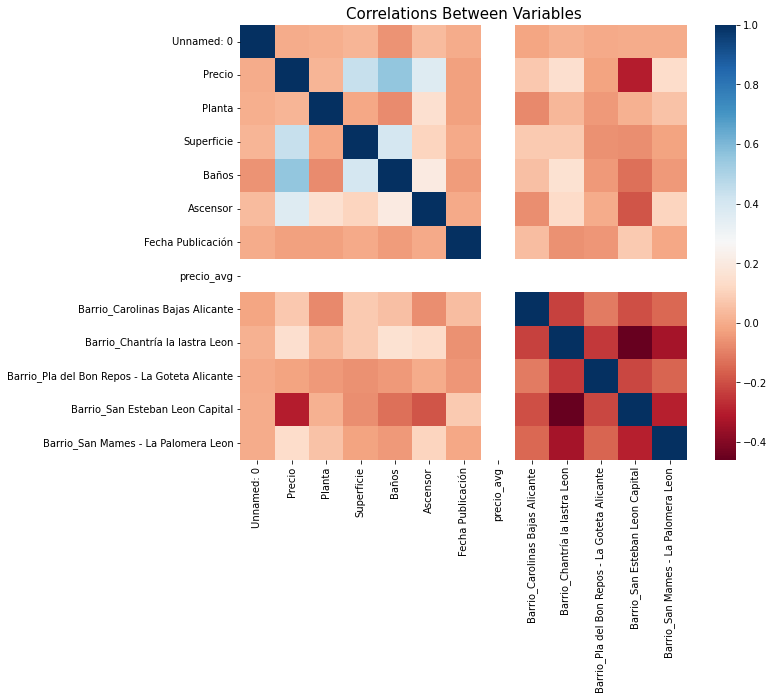

In [513]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()


In [514]:
important_num_cols = list(df.corr()["Precio"][(df.corr()["Precio"]>0.05) 
                                                 | (df.corr()["Precio"]<-0.05)].index)
important_num_cols

['Precio',
 'Superficie',
 'Baños',
 'Ascensor',
 'Barrio_Carolinas Bajas Alicante',
 'Barrio_Chantría la lastra Leon',
 'Barrio_San Esteban Leon Capital',
 'Barrio_San Mames - La Palomera Leon']

In [515]:
price_df=df[important_num_cols]


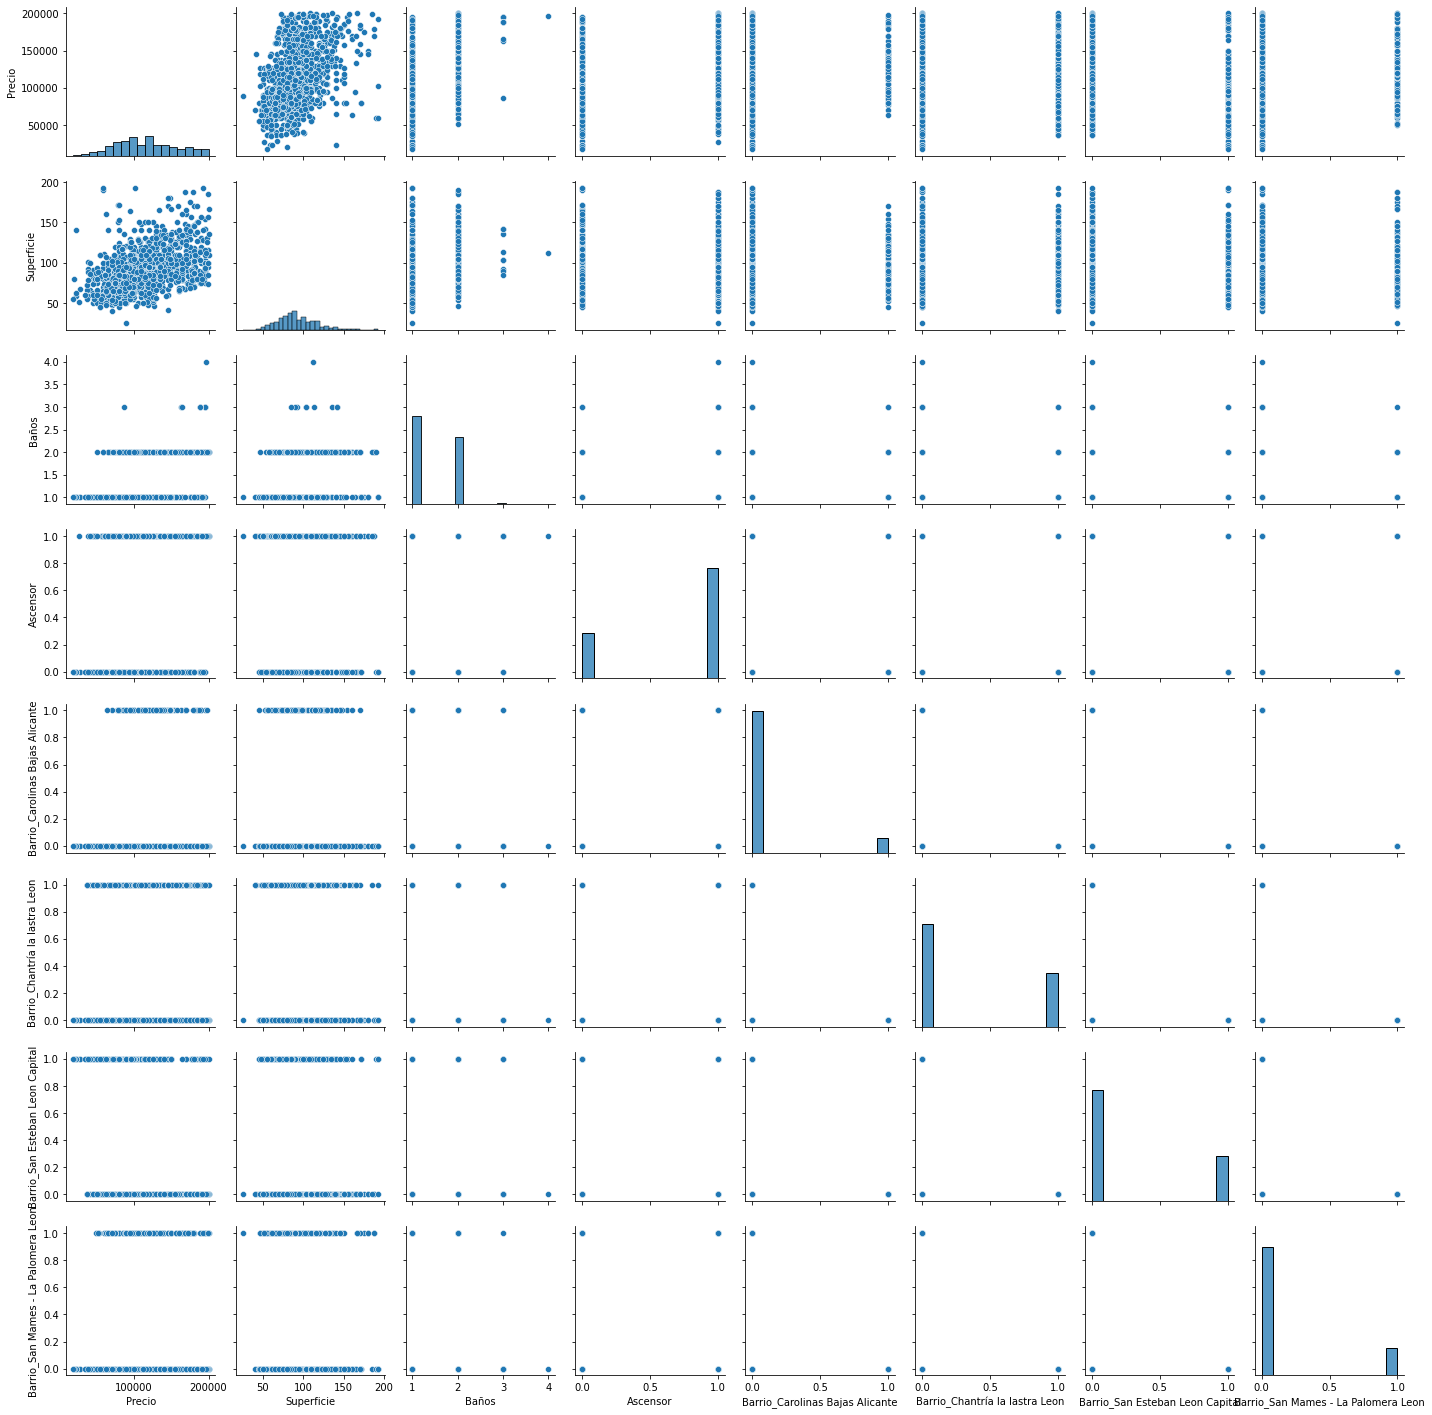

In [516]:
sns.pairplot(df[important_num_cols])

In [517]:
X = price_df.drop("Precio", axis=1)
y = price_df["Precio"]


In [518]:
important_num_cols.remove("Precio")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])


In [519]:
X.head()

Superficie     Baños  Ascensor  Barrio_Carolinas Bajas Alicante  \
0   -0.120937 -0.860424  0.639034                         3.163798   
1   -0.752875 -0.860424 -1.564863                         3.163798   
2   -0.673882 -0.860424  0.639034                         3.163798   
3   -0.318418 -0.860424  0.639034                         3.163798   
4    0.668984  1.071312 -1.564863                         3.163798   

   Barrio_Chantría la lastra Leon  Barrio_San Esteban Leon Capital  \
0                       -0.721515                        -0.636324   
1                       -0.721515                        -0.636324   
2                       -0.721515                        -0.636324   
3                       -0.721515                        -0.636324   
4                       -0.721515                        -0.636324   

   Barrio_San Mames - La Palomera Leon  
0                            -0.462828  
1                            -0.462828  
2                            -0.462828  
3                            -0.462828  
4                            -0.462828

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [521]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


In [522]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])


In [523]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)


MAE: 23154.7375267418
MSE: 840557927.0418856
RMSE: 28992.37705056082
R2 Score: 0.4425578445031221
------------------------------
RMSE Cross-Validation: 1.2264174548657712e+17


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/1295523157.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [524]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23153.060687411817
MSE: 840413834.9678718
RMSE: 28989.891944742943
R2 Score: 0.4426534036475239
------------------------------
RMSE Cross-Validation: 29203.404536444472


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/4265103120.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [525]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23154.51275069721
MSE: 840534566.9757944
RMSE: 28991.974182104164
R2 Score: 0.44257333645813846
------------------------------
RMSE Cross-Validation: 29204.494118667633


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/125974436.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [526]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23643.890901604867
MSE: 858559088.5175799
RMSE: 29301.178961222362
R2 Score: 0.430619813902694
------------------------------
RMSE Cross-Validation: 30046.68728050791


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/1212227766.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [527]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 22545.712388815675
MSE: 888092120.0672461
RMSE: 29800.874484941647
R2 Score: 0.41103406468093584
------------------------------
RMSE Cross-Validation: 29764.60457853683


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/3595251864.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [528]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 25032.59106507755
MSE: 1081043149.4440382
RMSE: 32879.22063316037
R2 Score: 0.283072583073517
------------------------------
RMSE Cross-Validation: 32922.19154414418


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/2244778151.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [529]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 24242.827355439527
MSE: 975177447.1156826
RMSE: 31227.831290624115
R2 Score: 0.35328071912285874
------------------------------
RMSE Cross-Validation: 31267.38163072618


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/110801340.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [530]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 22771.614713216957
MSE: 828701821.3656484
RMSE: 28787.181546057065
R2 Score: 0.45042059005739854
------------------------------
RMSE Cross-Validation: 1.2264174548657712e+17


/var/folders/zk/slrtmhdd7kd3g8n3jb1bd1700000gn/T/ipykernel_9664/354636399.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [531]:
models.sort_values(by="RMSE (Cross-Validation)")

Model           MAE                MSE  \
1                             Ridge  23153.060687   840413834.967872   
2                             Lasso  23154.512751   840534566.975794   
4                               SVR  22545.712389   888092120.067246   
3                        ElasticNet  23643.890902    858559088.51758   
6                      XGBRegressor  24242.827355   975177447.115683   
5             RandomForestRegressor  25032.591065  1081043149.444038   
0                  LinearRegression  23154.737527   840557927.041886   
7  Polynomial Regression (degree=2)  22771.614713   828701821.365648   

           RMSE  R2 Score RMSE (Cross-Validation)  
1  28989.891945  0.442653            29203.404536  
2  28991.974182  0.442573            29204.494119  
4  29800.874485  0.411034            29764.604579  
3  29301.178961   0.43062            30046.687281  
6  31227.831291  0.353281            31267.381631  
5  32879.220633  0.283073            32922.191544  
0  28992.377051  0.442558    122641745486577120.0  
7  28787.181546  0.450421    122641745486577120.0

In [532]:
df

Unnamed: 0  \
0            0.0   
1            1.0   
2            2.0   
3            3.0   
4            4.0   
5            5.0   
6            6.0   
7            7.0   
8            8.0   
9            9.0   
10          10.0   
11          11.0   
12          12.0   
13          13.0   
15          15.0   
16          16.0   
18          18.0   
20          20.0   
21          21.0   
22          22.0   
23          23.0   
25          25.0   
26          26.0   
27          27.0   
28          28.0   
29          29.0   
30          30.0   
31           0.0   
32           1.0   
33           2.0   
34           3.0   
35           4.0   
36           5.0   
37           6.0   
38           7.0   
39           8.0   
40           9.0   
41          10.0   
42          11.0   
44          13.0   
45          14.0   
46          15.0   
47          16.0   
48          17.0   
49          18.0   
50          19.0   
51          20.0   
52          21.0   
53          22.0   
58          27.0   
59          28.0   
60          29.0   
61           0.0   
62           1.0   
63           2.0   
64           3.0   
65           4.0   
66           5.0   
67           6.0   
68           7.0   
70           9.0   
71          10.0   
72          11.0   
73          12.0   
74          13.0   
75          14.0   
76          15.0   
77          16.0   
78          17.0   
79          18.0   
80          19.0   
81          20.0   
82          21.0   
83          22.0   
84          23.0   
85          24.0   
86          25.0   
88          27.0   
89          28.0   
91           0.0   
92           1.0   
93           2.0   
94           3.0   
95           4.0   
96           5.0   
97           6.0   
98           7.0   
99           8.0   
100          9.0   
101         10.0   
102         11.0   
103         12.0   
104         13.0   
107         16.0   
109         18.0   
111         20.0   
112         21.0   
113         22.0   
115         24.0   
116         25.0   
118         27.0   
119         28.0   
120         29.0   
122          1.0   
123          0.0   
124          1.0   
128          5.0   
130          7.0   
132          9.0   
134         11.0   
135         12.0   
136         13.0   
139         16.0   
140         17.0   
141         18.0   
143         20.0   
145         22.0   
147         24.0   
148         25.0   
149         26.0   
154          1.0   
155          2.0   
157          4.0   
158          5.0   
161          8.0   
166         13.0   
168         15.0   
170         17.0   
172         19.0   
173         20.0   
179         26.0   
180         27.0   
184          1.0   
185          2.0   
186          3.0   
188          5.0   
190          7.0   
191          8.0   
192          9.0   
194         11.0   
195         12.0   
196         13.0   
199         16.0   
202         19.0   
203         20.0   
204         21.0   
206         23.0   
208         25.0   
209         26.0   
210         27.0   
212         29.0   
213          0.0   
215          2.0   
216          3.0   
217          4.0   
218          5.0   
221          8.0   
223         10.0   
230         17.0   
231         18.0   
232         19.0   
234         21.0   
235         22.0   
237         24.0   
238         25.0   
239         26.0   
240         27.0   
244          1.0   
245          2.0   
246          3.0   
248          5.0   
249          6.0   
252          9.0   
253         10.0   
254         11.0   
255         12.0   
256         13.0   
257         14.0   
258         15.0   
260         17.0   
261         18.0   
262         19.0   
263         20.0   
264         21.0   
265         22.0   
266         23.0   
268         25.0   
269         26.0   
270         27.0   
271         28.0   
272         29.0   
274          1.0   
278          5.0   
279          6.0   
281          8.0   
283         10.0   
286         13.0   
287         14.0   
289         16.0   
290   

In [533]:
predictions = xgb.predict(X)

In [534]:
df['price_predictions']= predictions

In [535]:
df['precio_avg_pred'] = df['price_predictions'].mean()/df['Superficie'].mean()

In [473]:
diferencia_precio_medio=df['precio_avg_pred'][0]-df['precio_avg'][0]
diferencia_precio_medio

17.295425175091168

<AxesSubplot:xlabel='Precio', ylabel='Count'>

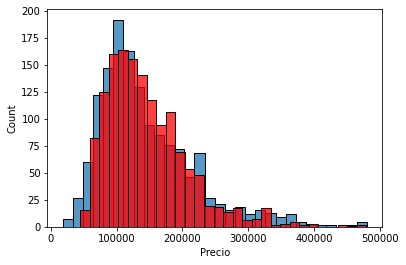

In [479]:
sns.histplot(data=df, x="Precio", bins=30)
sns.histplot(data=df, x="price_predictions", bins=30, color='red')


In [483]:
df['precio_vs_avg'] = (df['Precio']/df['Superficie'])- precio_medio
df['precio_vs_avg_pred'] = (df['price_predictions']/df['Superficie'])- precio_medio
df['dif_precio_vs_avg']=df['precio_vs_avg']-df['precio_vs_avg_pred'] 

In [487]:
df.sample(20)

Unnamed: 0  \
316         13.0   
252          9.0   
325         22.0   
200         17.0   
780         11.0   
1329        13.0   
442         19.0   
805          6.0   
1511         7.0   
8            8.0   
1246        20.0   
1470        26.0   
1481         7.0   
208         25.0   
1335        19.0   
791         22.0   
765         26.0   
1030        15.0   
334          1.0   
633         14.0   

                                                                          Título  \
316              Piso con terraza en Plaza del Espolón, San Mamés - La Palomera    
252                                Piso en Calle Medul, San Mamés - La Palomera    
325   Casa o chalet con 2 baños en Alfonso de la Cerda, San Mamés - La Palomera    
200              Piso en Calle Jorge de Montemayor, 16, San Mamés - La Palomera    
780                          Apartamento con terraza en La Chantría - La Lastra    
1329                                    Casa o chalet con 1 baño en San Esteban    
442                                 Piso con terraza en San Mamés - La Palomera    
805           Piso con ascensor en Calle Juan Pablo II, La Chantría - La Lastra    
1511                                        Piso con balcón en Pla de Bon Repós    
8                          Piso con terraza en Carrer Garbinet, Carolinas Bajas    
1246                          Casa o chalet con 1 baño en Nazareth, San Esteban    
1470                                      Piso con ascensor en Pla de Bon Repós    
1481                                 Apartamento con 1 baño en Pla de Bon Repós    
208                                             Piso en San Mamés - La Palomera    
1335                                  Piso en Plaza Padre Isla 125, San Esteban    
791                                  Piso con 1 baño en La Chantría - La Lastra    
765        Piso con terraza en Faustina Alvarez Garcia, La Chantría - La Lastra    
1030                     Dúplex con 2 baños en Gumersindo Azcarate, San Esteban    
334                            Piso en C/ Juan de Vega, San Mamés - La Palomera    
633              Piso con terraza en Comandante Zorita, La Chantría - La Lastra    

        Precio Habitaciones  Planta  Superficie  Baños  Ascensor  \
316    86000.0            3       1          80      1         1   
252   100000.0            4       3         110      2         1   
325   467000.0            3       3         180      2         0   
200   239500.0            3       3          94      2         1   
780   172000.0            2       3         102      2         1   
1329  150000.0            4       3         213      1         0   
442   118000.0            3       5          90      1         1   
805   153000.0            3       1          96      2         1   
1511  116000.0            3       5         110      1         1   
8     125000.0            4       2         115      2         1   
1246   75000.0            3       3          92      1         0   
1470  224900.0            3       3         125      2         1   
1481   99500.0            3       2          80      1         0   
208   137000.0            3       3          80      1         1   
1335  230000.0            6       5         191      2         1   
791    99000.0            2       3          90      1         1   
765   129000.0            1       2          73      1         1   
1030  145000.0            3       1         102      2         0   
334    74200.0            3       3          61      1         1   
633   284000.0            2       1         102      2         1   

      Fecha Publicación  \
316                  59   
252                 202   
325                  37   
200                 114   
780                 118   
1329                 79   
442                  29   
805                  65   
1511                  4   
8                     0   
1246                 98   
1470                 14   
1481                 23   
208          

In [485]:
df['dif_precio_vs_avg'].mean()

-0.771977616295789

<AxesSubplot:xlabel='dif_precio_vs_avg', ylabel='Count'>

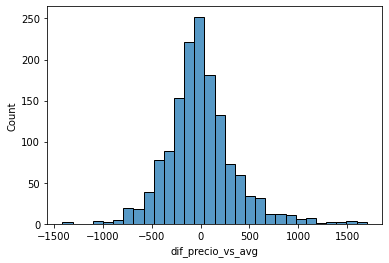

In [486]:
sns.histplot(data=df, x="dif_precio_vs_avg", bins=30)
